                             datetime platform  \
count                          263459   263459   
unique                         261204        4   
top     Thu, 06 Jul 2023 10:45:50 GMT      web   
freq                                3   236301   

                                               user_agent  \
count                                              263459   
unique                                                 32   
top     Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...   
freq                                                13623   

                                    visit_id  
count                                 263459  
unique                                146085  
top     64167edd-323a-4ab0-be9b-acd237a1ac30  
freq                                       4  
                             datetime               email platform  \
count                           21836               21836    21836   
unique                          21821               20868        3  

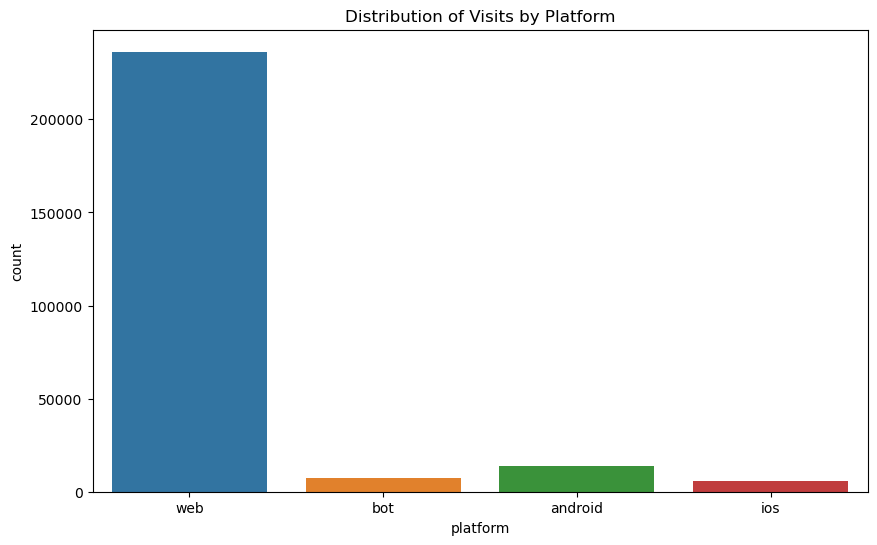

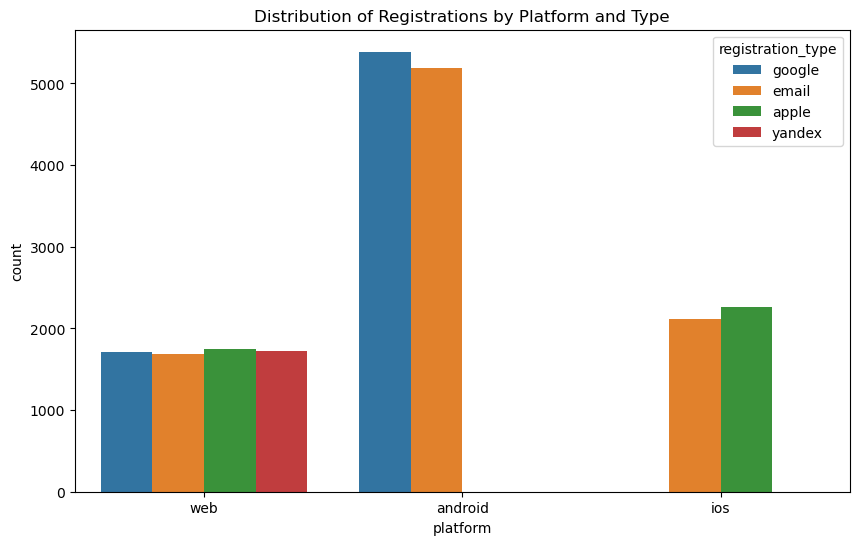

Visits DataFrame Description:
                             datetime platform  \
count                          263459   263459   
unique                         261204        4   
top     Thu, 06 Jul 2023 10:45:50 GMT      web   
freq                                3   236301   

                                               user_agent  \
count                                              263459   
unique                                                 32   
top     Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...   
freq                                                13623   

                                    visit_id  
count                                 263459  
unique                                146085  
top     64167edd-323a-4ab0-be9b-acd237a1ac30  
freq                                       4  
Registrations DataFrame Description:
                             datetime               email platform  \
count                           21836               21836    21836   
u

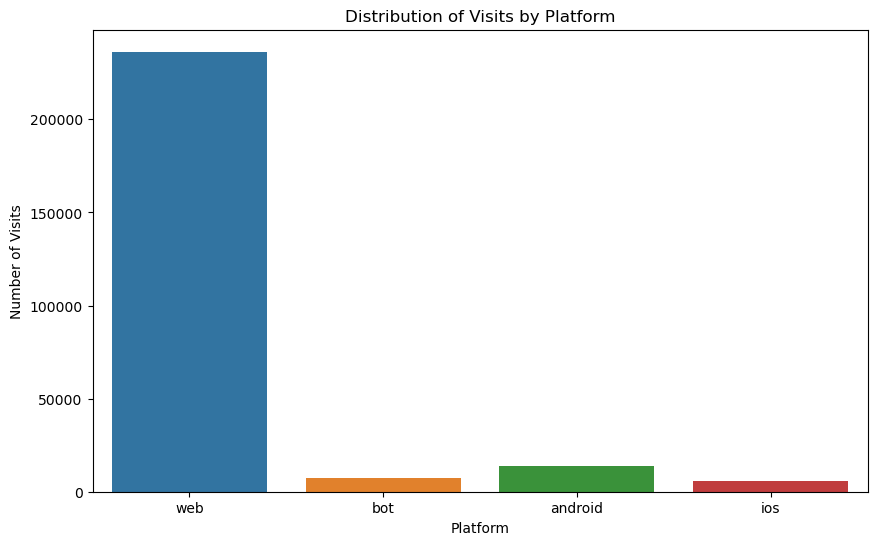

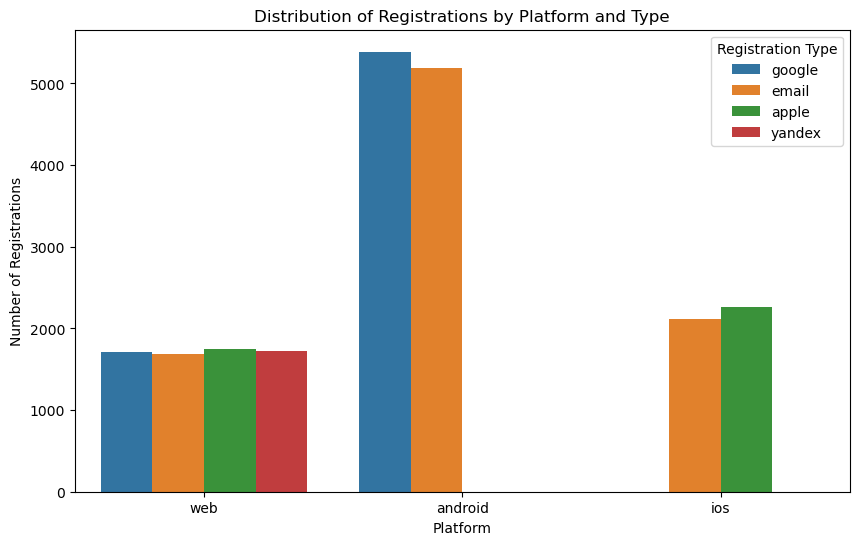

     date_group platform  visits  registrations  conversion
0    2023-03-01  android      75             61   81.333333
1    2023-03-01      ios      22             18   81.818182
2    2023-03-01      web     844              8    0.947867
3    2023-03-02  android      67             59   88.059701
4    2023-03-02      ios      31             24   77.419355
..          ...      ...     ...            ...         ...
546  2023-08-30  android      35             27   77.142857
548  2023-08-30      web    1357             34    2.505527
550  2023-08-31      ios      50             36   72.000000
549  2023-08-31  android      57             42   73.684211
551  2023-08-31      web     722             46    6.371191

[552 rows x 5 columns]
[{"date_group":"2023-03-01T00:00:00.000","platform":"android","visits":75,"registrations":61,"conversion":81.3333333333,"cost":212.0,"utm_campaign":"advanced_algorithms_series"},{"date_group":"2023-03-01T00:00:00.000","platform":"ios","visits":22,"registra

FileExistsError: [Errno 17] File exists: './charts'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
from plotly import express as px
from dotenv import load_dotenv
import os
load_dotenv()
def fetch_visits(api_url, start_date, end_date):
    response = requests.get(f"{api_url}/visits", params={'begin': start_date, 'end': end_date})
    if response.status_code == 200:
        return response.json()
    else:
        response.raise_for_status()

def fetch_registrations(api_url, start_date, end_date):
    response = requests.get(f"{api_url}/registrations", params={'begin': start_date, 'end': end_date})
    if response.status_code == 200:
        return response.json()
    else:
        response.raise_for_status()

# Запрос данных
api_url = os.getenv("API_URL")  # URL API должен быть сохранен в .env файле
start_date = os.getenv("start_date")
end_date = os.getenv("end_date")

visits_data = fetch_visits(api_url, start_date, end_date)
registrations_data = fetch_registrations(api_url, start_date, end_date)

# Преобразование данных в DataFrame
visits_df = pd.DataFrame(visits_data)
registrations_df = pd.DataFrame(registrations_data)

#step1
# Первичный анализ данных
print(visits_df.describe())
print(registrations_df.describe())

# Примеры анализа
print(visits_df.head())
print(registrations_df.head())

# Визуализация данных посещений по платформам
plt.figure(figsize=(10, 6))
sns.countplot(x='platform', data=visits_df)
plt.title('Distribution of Visits by Platform')
plt.show()

# Визуализация данных регистраций по платформам и типам регистраций
plt.figure(figsize=(10, 6))
sns.countplot(x='platform', hue='registration_type', data=registrations_df)
plt.title('Distribution of Registrations by Platform and Type')
plt.show()

#step2

# Первичный анализ данных
print("Visits DataFrame Description:")
print(visits_df.describe())

print("Registrations DataFrame Description:")
print(registrations_df.describe())

print("First 5 rows of Visits DataFrame:")
print(visits_df.head())

print("First 5 rows of Registrations DataFrame:")
print(registrations_df.head())

# Визуализация данных посещений по платформам
plt.figure(figsize=(10, 6))
sns.countplot(x='platform', data=visits_df)
plt.title('Distribution of Visits by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Visits')
plt.show()

# Визуализация данных регистраций по платформам и типам регистраций
plt.figure(figsize=(10, 6))
sns.countplot(x='platform', hue='registration_type', data=registrations_df)
plt.title('Distribution of Registrations by Platform and Type')
plt.xlabel('Platform')
plt.ylabel('Number of Registrations')
plt.legend(title='Registration Type')
plt.show()

#step3

# Удаление визитов ботов
visits_df = visits_df[~visits_df['user_agent'].str.contains('bot')]

# Преобразование колонок datetime в тип datetime
visits_df['datetime'] = pd.to_datetime(visits_df['datetime'])
registrations_df['datetime'] = pd.to_datetime(registrations_df['datetime'])

# Добавление колонки date_group, которая содержит только дату (без времени)
visits_df['date_group'] = visits_df['datetime'].dt.date
registrations_df['date_group'] = registrations_df['datetime'].dt.date

# Группировка данных визитов
visits_agg = visits_df.groupby(['date_group', 'platform']).size().reset_index(name='visits')

# Группировка данных регистраций
registrations_agg = registrations_df.groupby(['date_group', 'platform']).size().reset_index(name='registrations')

# Объединение данных визитов и регистраций
merged_df = pd.merge(visits_agg, registrations_agg, on=['date_group', 'platform'], how='left')
merged_df['registrations'] = merged_df['registrations'].fillna(0)  # Заполнение NaN значений в регистрациях нулями

# Расчет конверсии
merged_df['conversion'] = (merged_df['registrations'] / merged_df['visits']) * 100

# Сортировка данных по дате
merged_df = merged_df.sort_values(by='date_group')

# Сохранение данных в формате JSON
merged_df.to_json('conversion.json', orient='records', date_format='iso')

# Вывод результата
print(merged_df)

#step4
# Загрузка данных о рекламных кампаниях из CSV
ads_df = pd.read_csv('ads.csv')

# Преобразование колонки date в тип datetime и выделение только даты
ads_df['date'] = pd.to_datetime(ads_df['date']).dt.date

# Агрегирование данных о рекламных кампаниях по дате
ads_agg = ads_df.groupby('date').agg({'cost': 'sum', 'utm_campaign': 'first'}).reset_index()

# Переименование колонки date для соответствия с date_group в основном датафрейме
ads_agg = ads_agg.rename(columns={'date': 'date_group'})
ads_agg['utm_campaign'] = ads_agg['utm_campaign'].fillna('none')

# Объединение данных по дате и платформам
final_df = pd.merge(merged_df, ads_agg, on='date_group', how='left')

# Заполнение NaN значений в затратах и названиях кампаний
final_df['cost'] = final_df['cost'].fillna(0)
final_df['utm_campaign'] = final_df['utm_campaign'].fillna('none')

# Сохранение итогового датафрейма в формате JSON
final_df.to_json('ads.json', orient='records', date_format='iso')

# Проверка сохранения файла
with open('ads.json', 'r') as f:
    data = f.read()
    print(data[:1000])  # Вывод первых 1000 символов для проверки


# Функция для загрузки и подготовки данных
def prepare_data():
    # Загрузка данных из файлов (предполагаем, что файлы уже сохранены)
    conversion_df = pd.read_json('conversion.json')
    ads_df = pd.read_csv('ads.csv')
    
    # Преобразование столбцов 'date' и 'date_group' в формат datetime
    ads_df['date'] = pd.to_datetime(ads_df['date'])
    conversion_df['date_group'] = pd.to_datetime(conversion_df['date_group'])
    
    # Группировка данных по 'date' и объединение с 'conversion_df'
    ads_grouped = ads_df.groupby('date').agg({'cost': 'sum', 'utm_campaign': 'first'}).reset_index()
    final_df = pd.merge(conversion_df, ads_grouped, left_on='date_group', right_on='date', how='left')
    
    # Заполнение NaN значений в столбцах 'cost' и 'utm_campaign'
    final_df['cost'] = final_df['cost'].fillna(0)
    final_df['utm_campaign'] = final_df['utm_campaign'].fillna('none')
    
    return final_df

# Создание директории для сохранения графиков
os.makedirs('./charts', exist_ok=False)

# Подготовка данных
final_df = prepare_data()

# Построение графиков

# Итоговые визиты
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='visits')
plt.title('Total Visits Over Time')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.xticks(rotation=45)
plt.savefig('./charts/total_visits.png')
plt.show()

# Итоговые визиты с разбивкой по платформам
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='visits', hue='platform')
plt.title('Total Visits Over Time by Platform')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.savefig('./charts/total_visits_by_platform.png')
plt.show()

# Итоговые регистрации
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='registrations')
plt.title('Total Registrations Over Time')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.savefig('./charts/total_registrations.png')
plt.show()

# Итоговые регистрации с разбивкой по платформам
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='registrations', hue='platform')
plt.title('Total Registrations Over Time by Platform')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.savefig('./charts/total_registrations_by_platform.png')
plt.show()

# Конверсия по каждой платформе
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='conversion', hue='platform')
plt.title('Conversion Rate Over Time by Platform')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.savefig('./charts/conversion_rate_by_platform.png')
plt.show()

# Средняя конверсия
average_conversion = final_df.groupby('platform')['conversion'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=average_conversion, x='platform', y='conversion')
plt.title('Average Conversion Rate by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Conversion Rate (%)')
plt.savefig('./charts/average_conversion_rate.png')
plt.show()

# Стоимости реклам
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='cost')
plt.title('Advertising Costs Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.savefig('./charts/advertising_costs.png')
plt.show()

# Визиты за весь период с цветовым выделением рекламной кампании
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='visits', hue='utm_campaign')
plt.title('Total Visits Over Time with UTM Campaign Highlight')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.xticks(rotation=45)
plt.legend(title='UTM Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./charts/total_visits_with_utm.png')
plt.show()

# Регистрации за весь период с цветовым выделением рекламной кампании
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='registrations', hue='utm_campaign')
plt.title('Total Registrations Over Time with UTM Campaign Highlight')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.legend(title='UTM Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./charts/total_registrations_with_utm.png')
plt.show()